# Stock Price Prediction by Machine Learning

In [1]:
#This code was written based on a tutorial (https://www.youtube.com/watch?v=QIUxPv5PJOY)
#to learn to create prediction models with python ML libraries.

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #başka bir scaler da dene.
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
df = web.DataReader('GOOGL', data_source='yahoo', start='2012-01-01', end='2021-01-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345647.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722272.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559234.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380414.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633555.0,311.541534
...,...,...,...,...,...,...
2021-01-25,1921.819946,1859.160034,1912.739990,1894.280029,2529300.0,1894.280029
2021-01-26,1915.750000,1876.130005,1885.989990,1907.949951,1573100.0,1907.949951
2021-01-27,1880.469971,1797.280029,1874.910034,1818.939941,4125600.0,1818.939941


In [4]:
df.shape

(2284, 6)

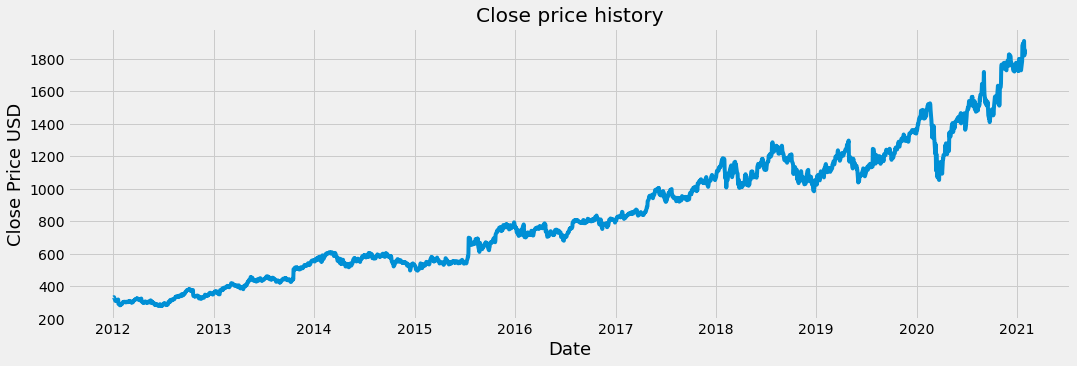

In [5]:
plt.figure(figsize=(16,5))
plt.title("Close price history")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD", fontsize=18)
plt.show()

In [6]:
data=df.filter(["Close"])

dataset = data.values

training_data_len = math.ceil(len(dataset) * 0.90)

training_data_len

2056

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03269562],
       [0.03357789],
       [0.03072824],
       ...,
       [0.94533042],
       [0.96637278],
       [0.95050198]])

In [8]:
train_data = scaled_data[0:training_data_len, :]

In [9]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)

[array([0.03269562, 0.03357789, 0.03072824, 0.02796466, 0.01949256,
       0.01970161, 0.02056849, 0.02169974, 0.0202703 , 0.0213739 ,
       0.02270495, 0.02475227, 0.0082815 , 0.00813701, 0.00672603,
       0.00320931, 0.00278201, 0.00643399, 0.00573003, 0.00647395,
       0.00669529, 0.00801097, 0.01146007, 0.01538256, 0.01466938,
       0.01561618, 0.01611111, 0.01440502, 0.01633859, 0.01558852,
       0.01429741, 0.01459253, 0.0140146 , 0.01689192, 0.01502904,
       0.0144665 , 0.01563155, 0.01545019, 0.01824144, 0.0181984 ,
       0.01947412, 0.01912061, 0.01696877, 0.01411297, 0.0146786 ,
       0.01478312, 0.01266509, 0.01417138, 0.01805391, 0.01750366,
       0.01908373, 0.02028567, 0.02303388, 0.02288326, 0.02487831,
       0.02674427, 0.02568063, 0.02775255, 0.02704244, 0.02972918])]
[0.027469744743590846]


In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1996, 60, 1)

In [12]:
#Building LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1218/1996 [=================>............] - ETA: 17s - loss: 0.0042

In [ ]:
#Create the testing dataset
test_data = scaled_data[ training_data_len-60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test,( x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Root mean squared error
rmse = np.sqrt (np.mean(predictions - y_test)**2)
rmse

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train" , "Val", "Predictions"], loc="lower right")
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

In [ ]:
#Get the quote
apple_quote = web.DataReader('GOOGL', data_source='yahoo', start='2012-01-01', end='2021-01-31')
new_df = apple_quote.filter(["Close"])
#Get the last 60 days closing prices and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data to be 3 dimensional
X_test = np.reshape(X_test,( X_test.shape[0], X_test.shape[1], 1 ))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
#Print the predicted price for 1 day after the train time interval
print(pred_price)

In [ ]:
#Get the actual quote
apple_quote2 = web.DataReader('GOOGL', data_source='yahoo', start='2021-01-31', end='2021-02-01')
print(apple_quote2["Close"])